In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df_train = pd.read_csv(
    'data/train.csv', 
    # usecols='Dates PdDistrict X Y Category'.split(),
    parse_dates=['Dates']
)
df_train.head()

# First, clean up the training data

In [ ]:
df_train.describe()

In [4]:
df_train.loc[df_train.Y == 90, 'Y'] = np.nan
df_train.loc[df_train.X == -120.50, 'X'] = np.nan
df_train.describe()

,X,Y
count,877982.000000,877982.000000
mean,-122.422763,37.767035
std,0.025285,0.024165
min,-122.513642,37.707879
25%,-122.432952,37.752427
50%,-122.416420,37.775421
75%,-122.406959,37.784368
max,-122.364937,37.819975


In [5]:
df_train.dropna(inplace=True)

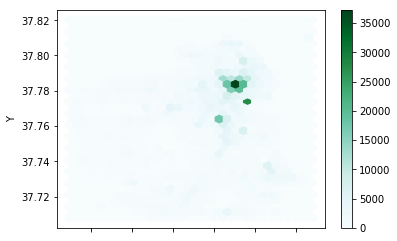

In [6]:
df_train.plot.hexbin('X', 'Y', gridsize=30)

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 877982 entries, 0 to 878048
Data columns (total 9 columns):
Dates         877982 non-null datetime64[ns]
Category      877982 non-null object
Descript      877982 non-null object
DayOfWeek     877982 non-null object
PdDistrict    877982 non-null object
Resolution    877982 non-null object
Address       877982 non-null object
X             877982 non-null float64
Y             877982 non-null float64
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 67.0+ MB


# Look at output counts

In [8]:
vcs = df_train.Category.value_counts()
vcs

LARCENY/THEFT                  174885
OTHER OFFENSES                 126165
NON-CRIMINAL                    92300
ASSAULT                         76872
DRUG/NARCOTIC                   53971
VEHICLE THEFT                   53772
VANDALISM                       44724
WARRANTS                        42206
BURGLARY                        36754
SUSPICIOUS OCC                  31412
MISSING PERSON                  25989
ROBBERY                         22999
FRAUD                           16679
FORGERY/COUNTERFEITING          10609
SECONDARY CODES                  9985
WEAPON LAWS                      8555
PROSTITUTION                     7484
TRESPASS                         7325
STOLEN PROPERTY                  4539
SEX OFFENSES FORCIBLE            4387
DISORDERLY CONDUCT               4318
DRUNKENNESS                      4280
RECOVERED VEHICLE                3138
KIDNAPPING                       2341
DRIVING UNDER THE INFLUENCE      2268
RUNAWAY                          1946
LIQUOR LAWS 

In [9]:
vcs /= vcs.sum()
vcs

LARCENY/THEFT                  0.199190
OTHER OFFENSES                 0.143699
NON-CRIMINAL                   0.105127
ASSAULT                        0.087555
DRUG/NARCOTIC                  0.061472
VEHICLE THEFT                  0.061245
VANDALISM                      0.050940
WARRANTS                       0.048072
BURGLARY                       0.041862
SUSPICIOUS OCC                 0.035777
MISSING PERSON                 0.029601
ROBBERY                        0.026195
FRAUD                          0.018997
FORGERY/COUNTERFEITING         0.012083
SECONDARY CODES                0.011373
WEAPON LAWS                    0.009744
PROSTITUTION                   0.008524
TRESPASS                       0.008343
STOLEN PROPERTY                0.005170
SEX OFFENSES FORCIBLE          0.004997
DISORDERLY CONDUCT             0.004918
DRUNKENNESS                    0.004875
RECOVERED VEHICLE              0.003574
KIDNAPPING                     0.002666
DRIVING UNDER THE INFLUENCE    0.002583


In [10]:
vcs.index[np.cumsum(vcs) > 0.99]

Index(['RUNAWAY', 'LIQUOR LAWS', 'ARSON', 'LOITERING', 'EMBEZZLEMENT',
       'SUICIDE', 'FAMILY OFFENSES', 'BAD CHECKS', 'BRIBERY', 'EXTORTION',
       'SEX OFFENSES NON FORCIBLE', 'GAMBLING', 'PORNOGRAPHY/OBSCENE MAT',
       'TREA'],
      dtype='object')

In [11]:
df_train.loc[
    df_train.Category.isin(vcs.index[np.cumsum(vcs) > 0.99]),
    'Category'
] = 'OTHER'

In [12]:
df_train.Category.value_counts()

LARCENY/THEFT                  174885
OTHER OFFENSES                 126165
NON-CRIMINAL                    92300
ASSAULT                         76872
DRUG/NARCOTIC                   53971
VEHICLE THEFT                   53772
VANDALISM                       44724
WARRANTS                        42206
BURGLARY                        36754
SUSPICIOUS OCC                  31412
MISSING PERSON                  25989
ROBBERY                         22999
FRAUD                           16679
FORGERY/COUNTERFEITING          10609
OTHER                           10025
SECONDARY CODES                  9985
WEAPON LAWS                      8555
PROSTITUTION                     7484
TRESPASS                         7325
STOLEN PROPERTY                  4539
SEX OFFENSES FORCIBLE            4387
DISORDERLY CONDUCT               4318
DRUNKENNESS                      4280
RECOVERED VEHICLE                3138
KIDNAPPING                       2341
DRIVING UNDER THE INFLUENCE      2268
Name: Catego

# Look at time distribution

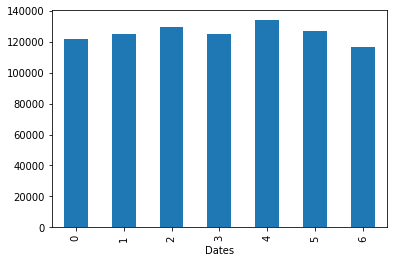

In [13]:
df_train.groupby(df_train.Dates.dt.weekday).size().plot.bar()

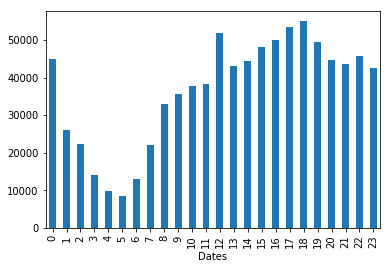

In [14]:
df_train.groupby(df_train.Dates.dt.hour).size().plot.bar()

# Add in weather data (but don't use it yet)

In [15]:
weather = pd.read_csv(
    'data/weather.csv', 
    usecols='DATE PRCP TMIN TMAX'.split(),
    parse_dates=['DATE'], 
    index_col=['DATE']
)
weather.head()

,PRCP,TMAX,TMIN
DATE,,,
2003-01-01,0.0,59,46
2003-01-02,0.0,57,48
2003-01-03,0.0,63,47
2003-01-04,0.0,66,50
2003-01-05,0.0,69,49


In [16]:
df_train['date'] = pd.to_datetime(df_train.Dates.dt.date)
df_train.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,date
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015-05-13
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015-05-13
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015-05-13
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,2015-05-13
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,2015-05-13


In [17]:
df_train = pd.merge(df_train, weather, left_on='date', right_index=True)
df_train.drop('date', axis=1)

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,PRCP,TMAX,TMIN
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,0.0,61,50
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,0.0,61,50
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,0.0,61,50
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,0.0,61,50
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,0.0,61,50
5,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,Wednesday,INGLESIDE,NONE,0 Block of TEDDY AV,-122.403252,37.713431,0.0,61,50
6,2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Wednesday,INGLESIDE,NONE,AVALON AV / PERU AV,-122.423327,37.725138,0.0,61,50
7,2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Wednesday,BAYVIEW,NONE,KIRKWOOD AV / DONAHUE ST,-122.371274,37.727564,0.0,61,50
8,2015-05-13 23:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,RICHMOND,NONE,600 Block of 47TH AV,-122.508194,37.776601,0.0,61,50
9,2015-05-13 23:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,CENTRAL,NONE,JEFFERSON ST / LEAVENWORTH ST,-122.419088,37.807802,0.0,61,50


In [18]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA

In [19]:
df_train['year'] = df_train.Dates.dt.year
df_train['month'] = df_train.Dates.dt.month
df_train['hour'] = df_train.Dates.dt.hour

# Sample data for quick training

We'll also up-sample the more rare categories so we can do appropriate stratified validation

In [54]:
df = df_train.sample(10000, random_state=123)
classes = df.Category.value_counts()
classes

LARCENY/THEFT                  2034
OTHER OFFENSES                 1434
NON-CRIMINAL                   1061
ASSAULT                         910
VEHICLE THEFT                   635
DRUG/NARCOTIC                   616
VANDALISM                       504
WARRANTS                        448
BURGLARY                        410
SUSPICIOUS OCC                  345
MISSING PERSON                  286
ROBBERY                         219
FRAUD                           178
SECONDARY CODES                 133
FORGERY/COUNTERFEITING          114
WEAPON LAWS                     109
OTHER                            99
TRESPASS                         87
PROSTITUTION                     71
SEX OFFENSES FORCIBLE            63
DRUNKENNESS                      54
STOLEN PROPERTY                  52
DISORDERLY CONDUCT               51
RECOVERED VEHICLE                31
KIDNAPPING                       28
DRIVING UNDER THE INFLUENCE      28
Name: Category, dtype: int64

In [55]:
df.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,date,PRCP,TMAX,TMIN,year,month,hour
516138,2008-02-05 20:20:00,ASSAULT,BATTERY,Tuesday,RICHMOND,NONE,3800 Block of GEARY BL,-122.460551,37.781314,2008-02-05,0.00,57,43,2008,2,20
667019,2005-11-28 17:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Monday,SOUTHERN,NONE,100 Block of VALENCIA ST,-122.422513,37.770711,2005-11-28,0.83,59,48,2005,11,17
419551,2009-06-22 18:00:00,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM",Monday,RICHMOND,NONE,400 Block of 33RD AV,-122.493443,37.780636,2009-06-22,0.00,73,53,2009,6,18
492694,2008-06-01 13:06:00,DRUG/NARCOTIC,POSSESSION OF MARIJUANA,Sunday,SOUTHERN,"ARREST, BOOKED",HARRISON ST / 6TH ST,-122.404072,37.777274,2008-06-01,0.00,59,49,2008,6,13
514828,2008-02-09 10:30:00,OTHER OFFENSES,TRAFFIC VIOLATION,Saturday,MISSION,"ARREST, CITED",MISSION ST / 23RD ST,-122.418597,37.753838,2008-02-09,0.00,68,48,2008,2,10


In [56]:
def get_features(df):
    transformer = ColumnTransformer([
        ('xy', 'passthrough', 'X Y'.split()),
    #     ('xy', PCA(), 'X Y'.split()),
    #     ('text', text.HashingVectorizer(n_features=20), 'Address'),
    #     ('onehot', OneHotEncoder(), 'DayOfWeek PdDistrict year month hour'.split())
    ])    
    return transformer.fit_transform(df)

def get_target(df):
    return df['Category']

In [58]:
X, y = get_features(df), get_target(df)

# Try some quick and dirty models

In [59]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC

In [60]:
classifiers = {
    'logreg': LogisticRegression(),
    'logregcv': LogisticRegressionCV(),
    'svc': SVC(probability=True),
    'gb': GradientBoostingClassifier(),
    'sgd': SGDClassifier(max_iter=1000, tol=1e-3, loss='log'),
    'rf': RandomForestClassifier(),
    'k5': KNeighborsClassifier(n_neighbors=5),
    'k10': KNeighborsClassifier(n_neighbors=10),
    'k100': KNeighborsClassifier(n_neighbors=100),
    'k1000': KNeighborsClassifier(n_neighbors=1000),
}

In [61]:
from sklearn.model_selection import KFold, cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer, log_loss

cv = StratifiedKFold(n_splits=8, shuffle=True, random_state=123)
results = {}


In [63]:
for name, clf in classifiers.items():
    print(f'Evaluate {name}')
    result = cross_val_score(clf, X, y, cv=cv, scoring='neg_log_loss', n_jobs=-1)
    print(result, np.mean(result), np.std(result))
    results[f'initial: {name}'] = result

Evaluate logreg
[-2.65073199 -2.64879888 -2.64655398 -2.64500523 -2.63526819 -2.63273062
 -2.63029707 -2.62217532] -2.6389451573851934 0.009609899834934103
Evaluate logregcv
[-2.65503281 -2.65446779 -2.65290474 -2.64820963 -2.64094517 -2.63840952
 -2.63579488 -2.6277683 ] -2.644191604765389 0.009350112553256644
Evaluate svc
[-2.67442673 -2.64976522 -2.6414229  -2.68426345 -2.63964748 -2.64439644
 -2.6275468  -2.68499929] -2.655808537574492 0.020742555195800566
Evaluate gb
[-2.71942308 -2.66572788 -2.67451026 -2.73415053 -2.64626462 -2.69076036
 -2.75078932 -2.72559385] -2.700902487672373 0.03458461729392169
Evaluate sgd
[-20.82718784 -20.24641283 -18.7419347  -17.59882728 -18.28528253
 -20.75596125 -18.42980517 -16.3374914 ] -18.902862875559755 1.4939399770389628
Evaluate rf
[-17.10602197 -16.51417058 -17.57129493 -17.16727584 -17.27520636
 -16.78006564 -17.35702345 -17.56845069] -17.16743868326401 0.3449738901950864
Evaluate k5
[-18.19941302 -18.9446753  -19.8054735  -19.43681911 -18.

In [73]:
for name, res in sorted(results.items(), key=lambda t: -t[1].mean()):
    print(name, np.mean(res), np.std(res))

initial: k1000 -2.60587284801423 0.030802688873005718
initial: logreg -2.6389451573851934 0.009609899834934103
initial: logregcv -2.644191604765389 0.009350112553256644
initial: svc -2.655808537574492 0.020742555195800566
initial: gb -2.700902487672373 0.03458461729392169
initial: k100 -3.9332557333041436 0.04745380453552947
initial: k10 -14.026430103912231 0.39005833957950226
initial: rf -17.16743868326401 0.3449738901950864
initial: sgd -18.902862875559755 1.4939399770389628
initial: k5 -19.09470832923219 0.47223762527167173


The short list: mean score / std score

```
initial: k1000 -2.60587284801423 0.030802688873005718
initial: logreg -2.6389451573851934 0.009609899834934103
initial: svc -2.655808537574492 0.020742555195800566
initial: gb -2.700902487672373 0.03458461729392169
```

# Feature engineering

Could date and district information be predictive?

In [74]:
def get_features(df):
    transformer = ColumnTransformer([
        ('xy', 'passthrough', 'X Y'.split()),
    #     ('xy', PCA(), 'X Y'.split()),
    #     ('text', text.HashingVectorizer(n_features=20), 'Address'),
        ('onehot', OneHotEncoder(), 'DayOfWeek PdDistrict year month hour'.split())
    ])    
    return transformer.fit_transform(df)

X = get_features(df)

In [75]:
shortlist = {
    k: v for k, v in classifiers.items() 
    if k in 'logreg svc gb k1000'.split()}

for name, clf in shortlist.items():
    print(f'Evaluate {name}')
    result = cross_val_score(clf, X, y, cv=cv, scoring='neg_log_loss', n_jobs=-1)
    print(result, np.mean(result), np.std(result))
    results[f'onehot: {name}'] = result

Evaluate logreg
[-2.60066007 -2.63145023 -2.61271306 -2.60472939 -2.62667154 -2.5742069
 -2.59814926 -2.5968233 ] -2.60567546993423 0.016978024232996443
Evaluate svc
[-2.58917685 -2.60305981 -2.59105826 -2.60093558 -2.59416377 -2.58063717
 -2.58161427 -2.56981847] -2.588808022356199 0.010387437778826242
Evaluate gb
[-2.72294844 -2.71300526 -2.68821613 -2.70571764 -2.66791172 -2.6482282
 -2.67926181 -2.6663014 ] -2.6864488252730387 0.02417097641802579
Evaluate k1000
[-2.60220827 -2.60794733 -2.57982235 -2.6067761  -2.59881208 -2.56009131
 -2.58657571 -2.55704647] -2.5874099524582332 0.018948442150337665


In [76]:
for name, res in sorted(results.items(), key=lambda t: -t[1].mean()):
    print(name, np.mean(res), np.std(res))

onehot: k1000 -2.5874099524582332 0.018948442150337665
onehot: svc -2.588808022356199 0.010387437778826242
onehot: logreg -2.60567546993423 0.016978024232996443
initial: k1000 -2.60587284801423 0.030802688873005718
initial: logreg -2.6389451573851934 0.009609899834934103
initial: logregcv -2.644191604765389 0.009350112553256644
initial: svc -2.655808537574492 0.020742555195800566
onehot: gb -2.6864488252730387 0.02417097641802579
initial: gb -2.700902487672373 0.03458461729392169
initial: k100 -3.9332557333041436 0.04745380453552947
initial: k10 -14.026430103912231 0.39005833957950226
initial: rf -17.16743868326401 0.3449738901950864
initial: sgd -18.902862875559755 1.4939399770389628
initial: k5 -19.09470832923219 0.47223762527167173


# Let's try doing a StandardScaler on X/Y

In [77]:
from sklearn.preprocessing import StandardScaler

def get_features(df):
    transformer = ColumnTransformer([
        ('xy', StandardScaler(), 'X Y'.split()),
    #     ('xy', PCA(), 'X Y'.split()),
    #     ('text', text.HashingVectorizer(n_features=20), 'Address'),
        ('onehot', OneHotEncoder(), 'DayOfWeek PdDistrict year month hour'.split())
    ])    
    return transformer.fit_transform(df)

X = get_features(df)

In [79]:
for name, clf in shortlist.items():
    print(f'Evaluate {name}')
    result = cross_val_score(clf, X, y, cv=cv, scoring='neg_log_loss', n_jobs=-1)
    print(result, np.mean(result), np.std(result))
    results[f'scaler: {name}'] = result

Evaluate logreg
[-2.59595779 -2.63060539 -2.60625341 -2.60647691 -2.62151128 -2.56582528
 -2.59125885 -2.5895914 ] -2.600935038734939 0.018849680188945207
Evaluate svc
[-2.5832734  -2.59774458 -2.58374728 -2.59784712 -2.58427261 -2.57365647
 -2.57856807 -2.5637526 ] -2.5828577665776558 0.010708270323106917
Evaluate gb
[-2.75379652 -2.65437182 -2.70428616 -2.73928846 -2.65885434 -2.63317615
 -2.64010927 -2.65179005] -2.679459097118028 0.04363486393827284
Evaluate k1000
[-2.60564035 -2.60728968 -2.58069078 -2.63602299 -2.60168034 -2.56413092
 -2.63604089 -2.55154929] -2.5978806557582437 0.028843007661815422


In [80]:
for name, res in sorted(results.items(), key=lambda t: -t[1].mean()):
    print(name, np.mean(res), np.std(res))

scaler: svc -2.5828577665776558 0.010708270323106917
onehot: k1000 -2.5874099524582332 0.018948442150337665
onehot: svc -2.588808022356199 0.010387437778826242
scaler: k1000 -2.5978806557582437 0.028843007661815422
scaler: logreg -2.600935038734939 0.018849680188945207
onehot: logreg -2.6009350387734504 0.018849680231548923
initial: k1000 -2.60587284801423 0.030802688873005718
initial: logreg -2.6389451573851934 0.009609899834934103
initial: logregcv -2.644191604765389 0.009350112553256644
initial: svc -2.655808537574492 0.020742555195800566
scaler: gb -2.679459097118028 0.04363486393827284
onehot: gb -2.6864488252730387 0.02417097641802579
initial: gb -2.700902487672373 0.03458461729392169
initial: k100 -3.9332557333041436 0.04745380453552947
initial: k10 -14.026430103912231 0.39005833957950226
initial: rf -17.16743868326401 0.3449738901950864
initial: sgd -18.902862875559755 1.4939399770389628
initial: k5 -19.09470832923219 0.47223762527167173


# Try PCA on X/Y?

In [81]:
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA

def get_features(df):
    transformer = ColumnTransformer([
        ('xy', make_pipeline(StandardScaler(), PCA()), 'X Y'.split()),
    #     ('text', text.HashingVectorizer(n_features=20), 'Address'),
        ('onehot', OneHotEncoder(), 'DayOfWeek PdDistrict year month hour'.split())
    ])    
    return transformer.fit_transform(df)

X = get_features(df)

In [82]:
for name, clf in shortlist.items():
    print(f'Evaluate {name}')
    result = cross_val_score(clf, X, y, cv=cv, scoring='neg_log_loss', n_jobs=-1)
    print(result, np.mean(result), np.std(result))
    results[f'pca: {name}'] = result

Evaluate logreg
[-2.59595779 -2.63060539 -2.60625341 -2.60647691 -2.62151128 -2.56582528
 -2.59125885 -2.5895914 ] -2.600935038725657 0.01884968019560893
Evaluate svc
[-2.58200813 -2.59746648 -2.58474366 -2.59720699 -2.5858646  -2.57375726
 -2.578883   -2.56469807] -2.583078522064838 0.010372059897910306
Evaluate gb
[-2.71006425 -2.69238455 -2.68614789 -2.67424819 -2.66460041 -2.66800116
 -2.69697858 -2.64477785] -2.679650360494322 0.019484382095712658
Evaluate k1000
[-2.60564035 -2.60728968 -2.58068839 -2.63601475 -2.60167681 -2.56413092
 -2.63604089 -2.55154929] -2.5978788839840625 0.02884176635674789


In [83]:
for name, res in sorted(results.items(), key=lambda t: -t[1].mean()):
    print(name, np.mean(res), np.std(res))

scaler: svc -2.5828577665776558 0.010708270323106917
pca: svc -2.583078522064838 0.010372059897910306
onehot: k1000 -2.5874099524582332 0.018948442150337665
onehot: svc -2.588808022356199 0.010387437778826242
pca: k1000 -2.5978788839840625 0.02884176635674789
scaler: k1000 -2.5978806557582437 0.028843007661815422
pca: logreg -2.600935038725657 0.01884968019560893
scaler: logreg -2.600935038734939 0.018849680188945207
onehot: logreg -2.6009350387734504 0.018849680231548923
initial: k1000 -2.60587284801423 0.030802688873005718
initial: logreg -2.6389451573851934 0.009609899834934103
initial: logregcv -2.644191604765389 0.009350112553256644
initial: svc -2.655808537574492 0.020742555195800566
scaler: gb -2.679459097118028 0.04363486393827284
pca: gb -2.679650360494322 0.019484382095712658
onehot: gb -2.6864488252730387 0.02417097641802579
initial: gb -2.700902487672373 0.03458461729392169
initial: k100 -3.9332557333041436 0.04745380453552947
initial: k10 -14.026430103912231 0.390058339579

# Add in address (text) data

In [84]:
from sklearn.feature_extraction import text

def get_features(df):
    transformer = ColumnTransformer([
        ('xy', make_pipeline(StandardScaler(), PCA()), 'X Y'.split()),
        ('text', text.HashingVectorizer(n_features=5), 'Address'),
        ('onehot', OneHotEncoder(), 'DayOfWeek PdDistrict year month hour'.split())
    ])    
    return transformer.fit_transform(df)

X = get_features(df)

In [85]:
for name, clf in shortlist.items():
    print(f'Evaluate {name}')
    result = cross_val_score(clf, X, y, cv=cv, scoring='neg_log_loss', n_jobs=-1)
    print(result, np.mean(result), np.std(result))
    results[f'text: {name}'] = result

Evaluate logreg
[-2.58437327 -2.62473922 -2.60213152 -2.60694594 -2.61408779 -2.55157453
 -2.5911262  -2.59016117] -2.5956424565050904 0.020845101398977467
Evaluate svc
[-2.57271951 -2.5872459  -2.57607714 -2.58797054 -2.5768417  -2.56060002
 -2.56880482 -2.5574148 ] -2.573459301857989 0.010391935056815654
Evaluate gb
[-2.71845329 -2.64463526 -2.6547038  -2.67818516 -2.63664838 -2.7124487
 -2.65419579 -2.61748282] -2.664594149600365 0.0335043405077895
Evaluate k1000
[-2.65852023 -2.61858373 -2.58923656 -2.66346835 -2.61368716 -2.5688859
 -2.65268079 -2.56848784] -2.6166938212348363 0.036414788168902486


In [86]:
for name, res in sorted(results.items(), key=lambda t: -t[1].mean()):
    print(name, np.mean(res), np.std(res))

text: svc -2.573459301857989 0.010391935056815654
scaler: svc -2.5828577665776558 0.010708270323106917
pca: svc -2.583078522064838 0.010372059897910306
onehot: k1000 -2.5874099524582332 0.018948442150337665
onehot: svc -2.588808022356199 0.010387437778826242
text: logreg -2.5956424565050904 0.020845101398977467
pca: k1000 -2.5978788839840625 0.02884176635674789
scaler: k1000 -2.5978806557582437 0.028843007661815422
pca: logreg -2.600935038725657 0.01884968019560893
scaler: logreg -2.600935038734939 0.018849680188945207
onehot: logreg -2.6009350387734504 0.018849680231548923
initial: k1000 -2.60587284801423 0.030802688873005718
text: k1000 -2.6166938212348363 0.036414788168902486
initial: logreg -2.6389451573851934 0.009609899834934103
initial: logregcv -2.644191604765389 0.009350112553256644
initial: svc -2.655808537574492 0.020742555195800566
text: gb -2.664594149600365 0.0335043405077895
scaler: gb -2.679459097118028 0.04363486393827284
pca: gb -2.679650360494322 0.019484382095712658

# Add in weather data

In [87]:
def get_features(df):
    transformer = ColumnTransformer([
        ('xy', make_pipeline(StandardScaler(), PCA()), 'X Y'.split()),
        ('weather', StandardScaler(), 'PRCP TMIN TMAX'.split()),
        ('text', text.HashingVectorizer(n_features=5), 'Address'),
        ('onehot', OneHotEncoder(), 'DayOfWeek PdDistrict year month hour'.split())
    ])    
    return transformer.fit_transform(df)

X = get_features(df)

/Users/rick446/.virtualenvs/hackathon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/rick446/.virtualenvs/hackathon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [88]:
for name, clf in shortlist.items():
    print(f'Evaluate {name}')
    result = cross_val_score(clf, X, y, cv=cv, scoring='neg_log_loss', n_jobs=-1)
    print(result, np.mean(result), np.std(result))
    results[f'weather: {name}'] = result

Evaluate logreg
[-2.58803442 -2.63209245 -2.5997893  -2.61003027 -2.61868777 -2.55322848
 -2.59420053 -2.59496987] -2.5988791345823454 0.02196430226519669
Evaluate svc
[-2.57810742 -2.5939701  -2.58121215 -2.59238465 -2.5800314  -2.56619586
 -2.57504246 -2.56621619] -2.579145028588371 0.009700984663827444
Evaluate gb
[-2.65611791 -2.64746884 -2.64941948 -2.68491216 -2.60981897 -2.63621427
 -2.62161593 -2.65582101] -2.6451735697272505 0.021566111511296553
Evaluate k1000
[-2.65661386 -2.6170937  -2.6250064  -2.6588552  -2.59846883 -2.5921869
 -2.62367083 -2.60726103] -2.6223945935672015 0.023051181347692785


In [89]:
for name, res in sorted(results.items(), key=lambda t: -t[1].mean()):
    print(name, np.mean(res), np.std(res))

text: svc -2.573459301857989 0.010391935056815654
weather: svc -2.579145028588371 0.009700984663827444
scaler: svc -2.5828577665776558 0.010708270323106917
pca: svc -2.583078522064838 0.010372059897910306
onehot: k1000 -2.5874099524582332 0.018948442150337665
onehot: svc -2.588808022356199 0.010387437778826242
text: logreg -2.5956424565050904 0.020845101398977467
pca: k1000 -2.5978788839840625 0.02884176635674789
scaler: k1000 -2.5978806557582437 0.028843007661815422
weather: logreg -2.5988791345823454 0.02196430226519669
pca: logreg -2.600935038725657 0.01884968019560893
scaler: logreg -2.600935038734939 0.018849680188945207
onehot: logreg -2.6009350387734504 0.018849680231548923
initial: k1000 -2.60587284801423 0.030802688873005718
text: k1000 -2.6166938212348363 0.036414788168902486
weather: k1000 -2.6223945935672015 0.023051181347692785
initial: logreg -2.6389451573851934 0.009609899834934103
initial: logregcv -2.644191604765389 0.009350112553256644
weather: gb -2.6451735697272505 

# Feature importance analysis

- Can we bin the hours (morning, day, evening, late night?)
- Can we bin the months into seasons?
- What about a holiday flag?

# Evaluation

In [20]:
from sklearn.svm import SVC

In [32]:
df_train['year'] = df_train.Dates.dt.year
df_train['month'] = df_train.Dates.dt.month
df_train['hour'] = df_train.Dates.dt.hour
df_train.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,date,PRCP,TMAX,TMIN,year,month,hour
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015-05-13,0.0,61,50,2015,5,23
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015-05-13,0.0,61,50,2015,5,23
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015-05-13,0.0,61,50,2015,5,23
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,2015-05-13,0.0,61,50,2015,5,23
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,2015-05-13,0.0,61,50,2015,5,23


In [35]:
df_test = pd.read_csv('data/hackathon_test.csv', index_col='Id', parse_dates=['Dates'])
df_test['year'] = df_test.Dates.dt.year
df_test['month'] = df_test.Dates.dt.month
df_test['hour'] = df_test.Dates.dt.hour
df_test.head()

,Dates,DayOfWeek,PdDistrict,Address,X,Y,year,month,hour
Id,,,,,,,,,
0,2015-03-02 14:05:00,Monday,MISSION,200 Block of CHURCH ST,-122.428814,37.766808,2015,3,14
1,2004-01-23 20:00:00,Friday,BAYVIEW,0 Block of CONKLING ST,-122.401829,37.735606,2004,1,20
2,2014-01-12 00:01:00,Sunday,TENDERLOIN,300 Block of OFARRELL ST,-122.410509,37.786043,2014,1,0
3,2005-08-28 00:05:00,Sunday,SOUTHERN,100 Block of 3RD ST,-122.400916,37.785457,2005,8,0
4,2007-11-03 10:00:00,Saturday,CENTRAL,500 Block of UNION ST,-122.408600,37.800460,2007,11,10


In [36]:
df_test_result = pd.read_csv('data/hackathon_test_result.csv', index_col='Id')
df_test_result.head()

,Category
Id,
0,NON-CRIMINAL
1,LARCENY/THEFT
2,LARCENY/THEFT
3,NON-CRIMINAL
4,ASSAULT


In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction import text

def get_features(df):
    transformer = ColumnTransformer([
        ('xy', make_pipeline(StandardScaler(), PCA()), 'X Y'.split()),
        ('text', text.HashingVectorizer(n_features=5), 'Address'),
        ('onehot', OneHotEncoder(), 'DayOfWeek PdDistrict year month hour'.split())
    ])    
    return transformer.fit_transform(df)

X = get_features(df_train)

def get_target(df):
    return df['Category']

y = get_target(df_train)

In [42]:
clf = SVC()

In [ ]:
clf.fit(X, y)

/Users/rick446/.virtualenvs/hackathon/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [ ]:
Xtest = get_features(df_test)

In [ ]:
ypred = clf.predict_proba(Xtest)